# Bayesian Theorem 적용 사례

특정 약물 사용에 대한 검사의 민감도가 97%, 특이도가 95%라고 가정합니다.

즉, 이 테스트는 약물 사용자의 경우 97%의 양성 결과를, 비약물 사용자의 경우 95%의 음성 결과를 산출한다.

일반 인구의 0.5%가 해당 약물을 사용한다고 가정해 보면, 테스트에서 양성 반응을 보인 무작위로 선택된 개인이 약물 사용자일 확률은 얼마나 될까?

테스트 기능과 약물 사용자 비율에 대한 사전 지식을 입력으로 넣고 양성 결과에 따라 검사자가 약물 사용자일 확률을 출력하는 함수를 Python으로 분석한다.

The Bayes' rule based calculation is given by the following equation,
베이즈 규칙 기반의 계산은 다음 공식으로 대입한다:

$P(\text{User}) = \text{Prevelance rate(출현율)}$

$P(\text{Non-user}) = 1-\text{Prevelance rate(출현율)}$

$P(+|\text{User})=\text{Sensitivity}$

$P(-|\text{Non-user})=\text{Specificity}$

$P(+|\text{Non-user})=1-\text{Specificity}$

## 라이브러리 불러오기

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns

## 베이지안 규칙 사용자 정의 함수 지정

In [2]:
def drug_user(
    prob_th=0.5,
    sensitivity=0.99,
    specificity=0.99,
    prevelance=0.01,
    verbose=True
):
    """
    """
    p_user=prevelance
    p_non_user=1-prevelance
    p_pos_user=sensitivity
    p_neg_user=specificity
    p_pos_non_user=1-specificity
    
    num = p_pos_user*p_user
    den = p_pos_user*p_user+p_pos_non_user*p_non_user
    
    prob = num/den
    
    if verbose:
        if prob > prob_th:
            print("응시자는 약물 사용자가 될 수 있다.")
        else:
            print("응시자는 약물 사용자가 아닐 수 있다.")

    return prob

## 원래 질문에 제공된 세부 정보로 실행

In [3]:
p = drug_user(
    prob_th=0.5,
    sensitivity=0.97,
    specificity=0.95,
    prevelance=0.005
)

print("응시자가 약물 사용자일 확률:",round(p,3))

응시자는 약물 사용자가 아닐 수 있다.
응시자가 약물 사용자일 확률: 0.089


### 깊이 생각해보면 흥미롭지 않나요?

양성 사례를 잡아내는 데 97%, 음성 사례를 거부하는 데 95%의 정확도를 가진 테스트가 있어도 실제 양성 결과를 가진 약물 사용자일 확률은 8.9%에 불과하다!

계산을 살펴보면 이는 유병률이 매우 낮기 때문입니다. 오류탐지의 수가 정상탐지의 수보다 훨씬 더 많기 때문이다.

예를 들어 1000명이 검사를 받았다면 비사용자는 995명, 사용자는 5명이 될 것으로 예상됩니다. 995명의 비사용자 중에서 0.05 × 995 ≃ 50명의 오탐이 발생할 것으로 예상된다. 사용자 5명에서 0.95 × 5 ≈ 5개의 오탐이 예상되며, 55개의 양성 결과 중 5개만 진짜이다.!

출현율에 따라 확률이 어떻게 변하는지 살펴보자:

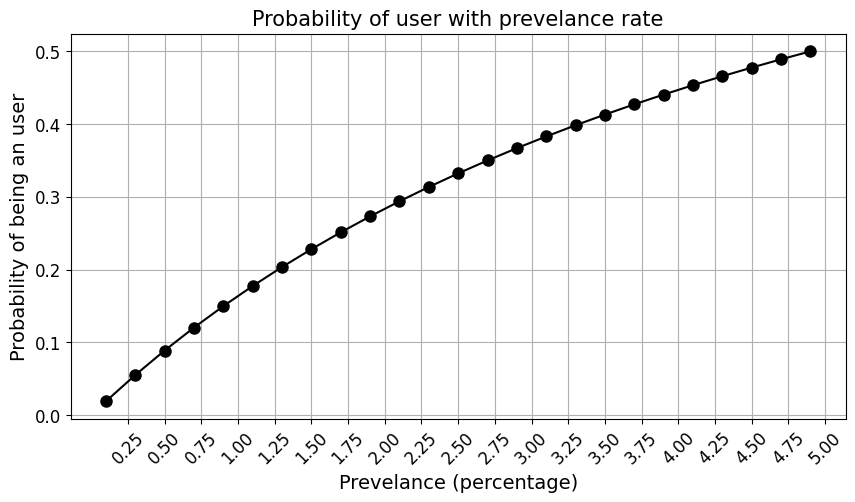

In [5]:
ps = []
pres = []
for pre in [i*0.001 for i in range(1,51,2)]:
    pres.append(pre*100)
    p = drug_user(
        prob_th=0.5,
        sensitivity=0.97,
        specificity=0.95,
        prevelance=pre,
        verbose=False
    )
    ps.append(p)

plt.figure(figsize=(10,5))
plt.title("Probability of user with prevelance rate",fontsize=15)
plt.plot(pres,ps,color='k',marker='o',markersize=8)
plt.grid(True)
plt.xlabel("Prevelance (percentage)",fontsize=14)
plt.ylabel("Probability of being an user",fontsize=14)
plt.xticks([i*0.25 for i in range(1,21)],fontsize=12,rotation=45)
plt.yticks(fontsize=12)
plt.show()

결정은 확률 임계값(Probability Threshold)에 따라 달라진다.
현재 임계값은 0.5 설정되어 있으며 필요에 따라 임계값을 조정하여 낮출 수 있다.

### 그렇다면 이 시나리오를 개선하려면 어느 정도의 테스트 역량이 필요할까?

테스트 민감도와 정확도는 이 계산에 큰 영향을 미친다. 따라서 약물 사용자를 적발할 가능성을 높이려면 어떤 종류의 기능이 필요한지 알아봐야 한다.

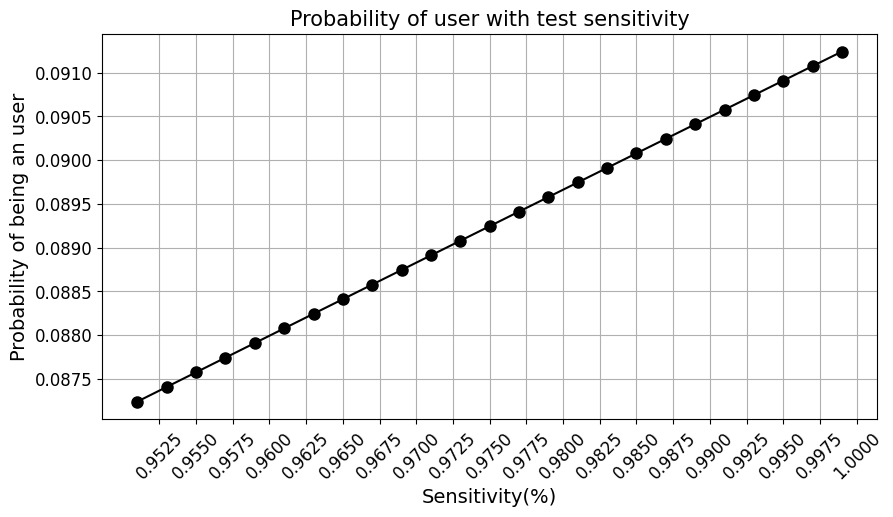

In [6]:
ps = []
sens = []
for sen in [i*0.001+0.95 for i in range(1,50,2)]:
    sens.append(sen)
    p = drug_user(
        prob_th=0.5,
        sensitivity=sen,
        specificity=0.95,
        prevelance=0.005,
        verbose=False
    )
    ps.append(p)

plt.figure(figsize=(10,5))
plt.title("Probability of user with test sensitivity",fontsize=15)
plt.plot(sens,ps,color='k',marker='o',markersize=8)
plt.grid(True)
plt.xlabel("Sensitivity(%)",fontsize=14)
plt.ylabel("Probability of being an user",fontsize=14)
plt.xticks([0.95+i*0.0025 for i in range(1,21)],fontsize=12,rotation=45)
plt.yticks(fontsize=12)
plt.show()

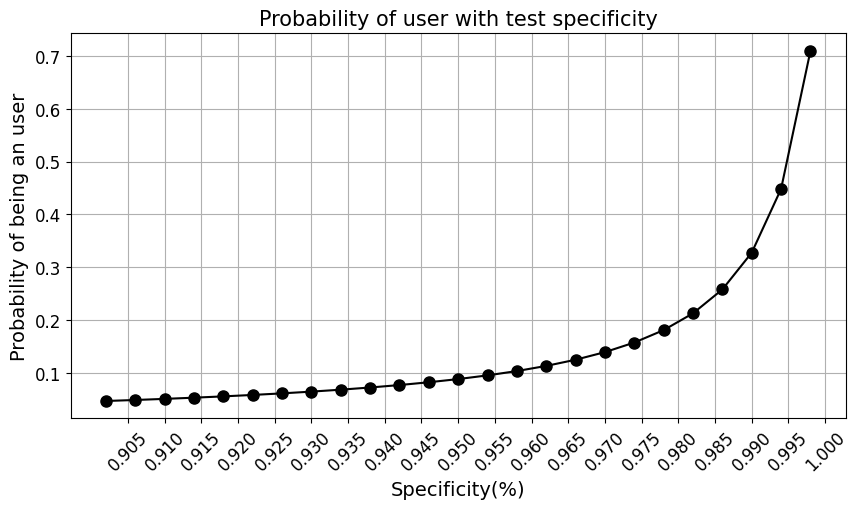

In [7]:
ps = []
spes = []
for spe in [i*0.002+0.9 for i in range(1,50,2)]:
    spes.append(spe)
    p = drug_user(
        prob_th=0.5,
        sensitivity=0.97,
        specificity=spe,
        prevelance=0.005,
        verbose=False
    )
    ps.append(p)

plt.figure(figsize=(10,5))
plt.title("Probability of user with test specificity",fontsize=15)
plt.plot(spes,ps,color='k',marker='o',markersize=8)
plt.grid(True)
plt.xlabel("Specificity(%)",fontsize=14)
plt.ylabel("Probability of being an user",fontsize=14)
plt.xticks([0.9+i*0.005 for i in range(1,21)],fontsize=12,rotation=45)
plt.yticks(fontsize=12)
plt.show()

### 분명한 것은, 민감도가 아닌 테스트의 특이성에 초점을 맞춰야 한다.

위의 시각화 결과는 민감도가 100%에 가까워도 별다른 이득을 얻지 못한다는 것을 분명히 보여준다. 그러나 확률 반응은 테스트의 특이도에 따라 매우 비선형적이며, 완벽에 가까워질수록 확률이 크게 증가한다. 따라서 모든 R&D 노력은 테스트의 특이도를 개선하는 방법에 집중되어야 한다.

이러한 결론은 확률이 낮을 때 가장 큰 문제는 낮은 유포율이라는 사실에서 직관적으로 도출한다. 따라서 비사용자를 정확하게 잡아내는 것(즉, 특이도를 높이는 것)은 사용자보다 훨씬 더 많은 숫자가 존재하기 때문에 우리가 집중해야 할 영역이다.

이 문제에서 부정적 예제 >> 긍정적 예제. 따라서 테스트의 True Negative 성능이 우수해야 한다.

### 베이지안 규칙을 두 번(또는 그 이상) 적용하는 것은 어떨까?

베이지안 추론의 가장 큰 장점은 베이지안 정리의 분자에 사전 확률 항의 형태로 사전 지식(Prior)을 사용할 수 있다는 점이다.

이 약물 스크리닝 환경에서 사전 지식은 테스트의 계산된 확률을 다음 테스트에 피드백하는 것에 불과하다.

즉, 일반 인구의 유병률이 극히 낮은 경우 첫 번째 검사 결과가 양성이면 후속 검사를 처방하는 것이 신뢰도를 높이는 한 가지 방법이다.

첫 번째 테스트의 확률은 두 번째 테스트의 선행 확률, 즉 $P(\text{User})$가 더 이상 이 두 번째 테스트의 일반적인 유병률이 아니라 첫 번째 테스트의 확률이 된다.

일련의 테스트를 통해 확률이 어떻게 변화하는지 살펴본다:

In [8]:
p1 = drug_user(
    prob_th=0.5,
    sensitivity=0.97,
    specificity=0.95,
    prevelance=0.005
)
print("첫번째 테스트에서 응시자가 약물 사용자 일 확률:",round(p1,3))
print()
p2 = drug_user(
    prob_th=0.5,
    sensitivity=0.97,
    specificity=0.95,
    prevelance=p1
)
print("두번째 테스트에서 응시자가 약물 사용자 일 확률:",round(p2,3))
print()
p3 = drug_user(
    prob_th=0.5,
    sensitivity=0.97,
    specificity=0.95,
    prevelance=p2
)
print("세번째 테스트에서 응시자가 약물 사용자 일 확률:",round(p3,3))

응시자는 약물 사용자가 아닐 수 있다.
첫번째 테스트에서 응시자가 약물 사용자 일 확률: 0.089

응시자는 약물 사용자가 될 수 있다.
두번째 테스트에서 응시자가 약물 사용자 일 확률: 0.654

응시자는 약물 사용자가 될 수 있다.
세번째 테스트에서 응시자가 약물 사용자 일 확률: 0.973


세 번 연속 테스트한 결과, 동일한 테스트 기능으로 실제 마약 사용자를 적발할 확률이 97.3%에 도달했다.

## 공장 품질 평가 예시¶

한 공장의 전체 생산량은 세 대의 기계에서 생산 중이다. 세 대의 기계가 공장 생산량의 각각 20%, 30%, 50%를 차지한다면, 생산되는 불량품의 비율은 첫 번째 기계의 경우 5%, 두 번째 기계의 경우 3%, 세 번째 기계의 경우 1%이다.

총 생산량에서 무작위로 한 품목이 선택되어 결함이 발견되면 세 번째 기계에서 생산되었을 확률은 얼마일지 계산 가능할까?

### 접근 방식

$X_i$는 $i^{th}$ 기계에서 무작위로 선택된 품목이 제조된 이벤트를 나타낸다.(i = A,B,C의 경우). $Y$는 무작위로 선택된 품목에 결함이 있는 경우를 나타낸다. 그러면 다음과 같은 정보가 주어집니다:

불량률에서 다음과 같은 정보가 주어진다면,

P(X_C|Y)$를 먼저 계산하여 베이즈 규칙을 적용한다,

이 경우 분모 $P(Y)$의 주요 미지수는 다음과 같이 계산할 수 있다.

따라서 $$ P(X_C|Y)= \frac{P(Y|X_C).P(X_C)}{P(Y)} \\ = \frac{(0.01)(0.5)}{0.024}\\ = 0.208 $$

### 인사이트¶

상품에 결함이 있다고 가정할 때, 세 번째 기계가 만들었을 확률은 0.208이다.

C 기계는 전체 생산량의 절반을 생산하지만 결함이 있는 품목 중 훨씬 적은 부분을 생산한다.. 따라서 선택한 품목에 결함이 있다는 것을 알면 이전 확률 $P(X_C)$ = 0.5를 더 작은 사수 확률 $P(X_C|Y)$ = 0.208로 대체할 수 있다.

### 시간 경과에 따른 변동성¶

일반적인 시나리오는 기계의 생산 능력 할당과 결함 성능이 정확히 일정하지 않고 시간에 따라 달라진다. 공장은 이러한 수치를 지속적으로 모니터링하고 위와 같이 베이즈 규칙을 사용하여 확률 추정치를 업데이트 할 수 있다.

이를 증명하기 위해 베이지안 규칙 계산에 확률적 변동을 추가하는 간단한 스크립트를 작성해보자:

In [9]:
def abs_array(array):
    return np.vectorize(np.abs)(array)

In [10]:
# 연간 52주 동안의 생산 능력 변동성
p_Xa = abs_array(0.2+np.random.normal(scale=0.05,size=52))
p_Xb = abs_array(0.3+np.random.normal(scale=0.03,size=52))
p_Xc = abs_array(0.5+np.random.normal(scale=0.07,size=52))

# 1년 52주 동안 결함 변동 확률
p_Y_Xa = abs_array(0.05+np.random.normal(scale=0.01,size=52))
p_Y_Xb = abs_array(0.03+np.random.normal(scale=0.015,size=52))
p_Y_Xc = abs_array(0.01+np.random.normal(scale=0.004,size=52))

In [12]:
# 총 확률: 베이즈 정리의 분모 부분
p_Y = p_Y_Xa*p_Xa+p_Y_Xb*p_Xb+p_Y_Xc*p_Xc

# 베이즈 법칙: 기계 A에서 생산된 품목이 결함이 발견될 확률
p_Xa_Y = (p_Y_Xa*p_Xa)/p_Y
# 베이즈 법칙: 기계 B에서 생산된 품목이 결함이 발견될 확률
p_Xb_Y = (p_Y_Xb*p_Xb)/p_Y
# 베이즈 법칙: 기계 C에서 생산된 품목이 결함이 발견될 확률
p_Xc_Y = (p_Y_Xc*p_Xc)/p_Y

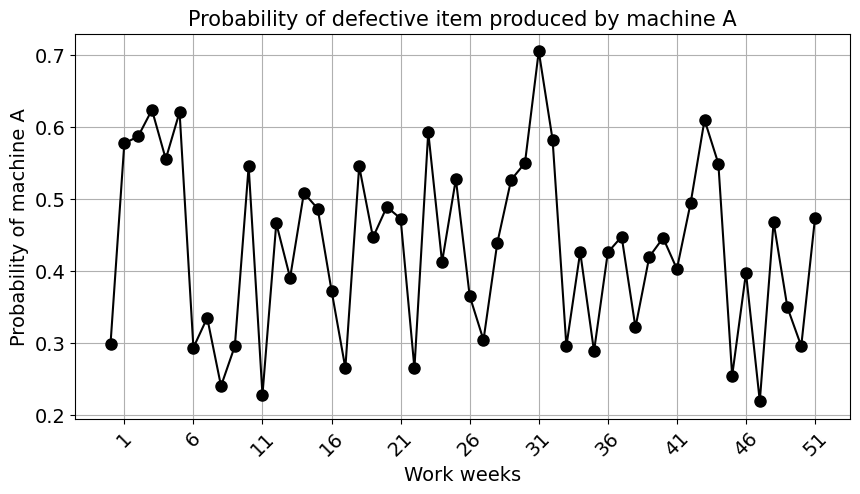

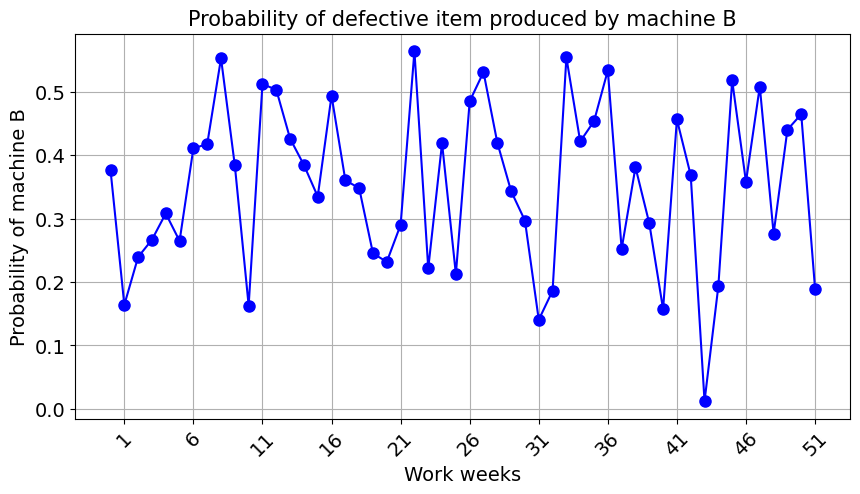

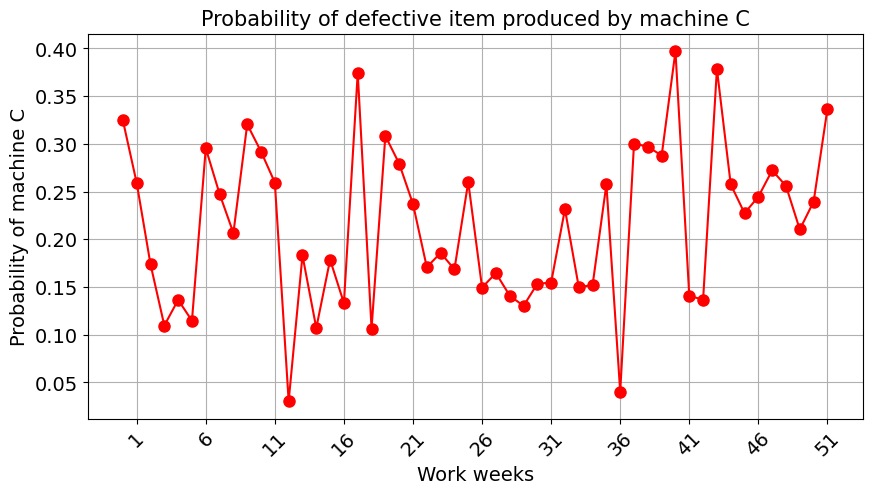

In [13]:
plt.figure(figsize=(10,5))
plt.title("Probability of defective item produced by machine A",fontsize=15)
plt.plot(p_Xa_Y,color='k',marker='o',markersize=8)
plt.grid(True)
plt.xlabel("Work weeks",fontsize=14)
plt.ylabel("Probability of machine A",fontsize=14)
plt.xticks([i for i in range(1,53,5)],fontsize=14,rotation=45)
plt.yticks(fontsize=14)

plt.figure(figsize=(10,5))
plt.title("Probability of defective item produced by machine B",fontsize=15)
plt.plot(p_Xb_Y,color='blue',marker='o',markersize=8)
plt.grid(True)
plt.xlabel("Work weeks",fontsize=14)
plt.ylabel("Probability of machine B",fontsize=14)
plt.xticks([i for i in range(1,53,5)],fontsize=14,rotation=45)
plt.yticks(fontsize=14)
plt.show()

plt.figure(figsize=(10,5))
plt.title("Probability of defective item produced by machine C",fontsize=15)
plt.plot(p_Xc_Y,color='red',marker='o',markersize=8)
plt.grid(True)
plt.xlabel("Work weeks",fontsize=14)
plt.ylabel("Probability of machine C",fontsize=14)
plt.xticks([i for i in range(1,53,5)],fontsize=14,rotation=45)
plt.yticks(fontsize=14)
plt.show()

plt.show()